In [1]:
from src.loader import Loader

loader = Loader.preprocessed()
loader

In [78]:
df=loader.get_sample(1000000)
df

,off_street_name,latitude,longitude,number_of_pedestrians_killed,vehicle_type_code1,vehicle_type_code2,zip_code,vehicle_type_code_4,number_of_persons_injured,number_of_cyclist_killed,...,contributing_factor_vehicle_1,contributing_factor_vehicle_4,contributing_factor_vehicle_2,number_of_pedestrians_injured,collision_id,crash_date,crash_time,number_of_motorist_killed,number_of_cyclist_injured,vehicle_type_code_5
3344,VANWYCK EXPRESSWAY,None,None,0,Sedan,None,None,None,0,0,...,Unspecified,None,None,0,4409583,2021-04-20T00:00:00.000,11:30,0,0,None
5515,VANWYCK EXPRESSWAY,None,None,0,Sedan,None,None,None,0,0,...,Passing or Lane Usage Improper,None,Unspecified,0,4487132,2021-12-17T00:00:00.000,4:08,0,0,None
7988,None,40.68866,-73.922905,0,Sedan,None,11221,None,0,0,...,Unspecified,None,None,0,4458828,2021-09-16T00:00:00.000,14:25,0,0,None
7931,None,40.708965,-73.95673,0,Sedan,None,11211,None,0,0,...,Unspecified,None,None,0,4458205,2021-09-16T00:00:00.000,12:30,0,0,None
3187,79 AVENUE,None,None,0,Sedan,Station Wagon/Sport Utility Vehicle,11040,None,1,0,...,Traffic Control Disregarded,None,Unspecified,0,4467016,2021-10-14T00:00:00.000,8:15,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7526,BEDFORD AVENUE,None,None,0,Pick-up Truck,Bike,11226,None,1,0,...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,None,Unspecified,0,3435821,2016-03-14T00:00:00.000,21:19,0,1,None
6109,QUEENS MIDTOWN EXPRESSWAY,40.7254319,-73.8962172,0,PASSENGER VEHICLE,PASSENGER VEHICLE,11378,None,0,0,...,Unspecified,None,Unspecified,0,3403725,2016-03-10T00:00:00.000,18:37,0,0,None
309,111 STREET,40.6824607,-73.8300148,0,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,11419,None,0,0,...,Driver Inexperience,None,Prescription Medication,0,3391977,2016-02-19T00:00:00.000,17:30,0,0,None
6758,BROADWAY,None,None,0,Sedan,Sedan,10031,None,0,0,...,Failure to Yield Right-of-Way,None,Unspecified,0,3410201,2016-03-14T00:00:00.000,11:00,0,0,None


In [79]:
import pandas as pd
import pandas as pd
import numpy as np

def preprocess_data(df):
    # Drop 'location' column
    df = df.drop(columns=['location'], errors='ignore')

    # Define column type mappings
    type_mappings = {
        'off_street_name': pd.StringDtype(), 'latitude': pd.Float32Dtype(), 'longitude': pd.Float32Dtype(),
        'number_of_pedestrians_killed': pd.Int64Dtype(), 'vehicle_type_code1': pd.StringDtype(),
        'vehicle_type_code2': pd.StringDtype(), 'zip_code': pd.StringDtype(), 'vehicle_type_code_4': pd.StringDtype(),
        'number_of_persons_injured': pd.Int64Dtype(), 'number_of_cyclist_killed': pd.Int64Dtype(),
        'number_of_motorist_injured': pd.Int64Dtype(), 'number_of_persons_killed': pd.Int64Dtype(),
        'cross_street_name': pd.StringDtype(), 'contributing_factor_vehicle_3': pd.StringDtype(), 'borough': pd.StringDtype(),
        'on_street_name': pd.StringDtype(), 'contributing_factor_vehicle_5': pd.StringDtype(),
        'vehicle_type_code_3': pd.StringDtype(), 'contributing_factor_vehicle_1': pd.StringDtype(),
        'contributing_factor_vehicle_4': pd.StringDtype(), 'contributing_factor_vehicle_2': pd.StringDtype(),
        'number_of_pedestrians_injured': pd.Int64Dtype(), 'collision_id': pd.StringDtype(),
        'number_of_motorist_killed': pd.Int64Dtype(), 'number_of_cyclist_injured': pd.Int64Dtype(),
        'vehicle_type_code_5': pd.StringDtype()
    }

    # Replace empty strings or 'None' strings with NaN
    df = df.replace({'': np.nan, 'None': np.nan})

    # Convert column types
    for col, dtype in type_mappings.items():
        if col in df.columns:
            df[col] = df[col].astype(dtype, errors='ignore')

    # Convert date and time columns
    if 'crash_date' in df.columns:
        df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce').dt.date
    if 'crash_time' in df.columns:
        def time_to_minutes(t):
            try:
                h, m = map(int, t.split(':'))
                return h * 60 + m
            except (ValueError, AttributeError):  # Handle NaNs or malformed values
                return np.nan

        df['crash_time'] = df['crash_time'].apply(time_to_minutes).astype(pd.Int64Dtype())

    return df


In [80]:
df_clean=preprocess_data(df)
df_clean


,off_street_name,latitude,longitude,number_of_pedestrians_killed,vehicle_type_code1,vehicle_type_code2,zip_code,vehicle_type_code_4,number_of_persons_injured,number_of_cyclist_killed,...,contributing_factor_vehicle_1,contributing_factor_vehicle_4,contributing_factor_vehicle_2,number_of_pedestrians_injured,collision_id,crash_date,crash_time,number_of_motorist_killed,number_of_cyclist_injured,vehicle_type_code_5
3344,VANWYCK EXPRESSWAY,<NA>,<NA>,0,Sedan,<NA>,<NA>,<NA>,0,0,...,Unspecified,<NA>,<NA>,0,4409583,2021-04-20,690,0,0,<NA>
5515,VANWYCK EXPRESSWAY,<NA>,<NA>,0,Sedan,<NA>,<NA>,<NA>,0,0,...,Passing or Lane Usage Improper,<NA>,Unspecified,0,4487132,2021-12-17,248,0,0,<NA>
7988,<NA>,40.68866,-73.922905,0,Sedan,<NA>,11221,<NA>,0,0,...,Unspecified,<NA>,<NA>,0,4458828,2021-09-16,865,0,0,<NA>
7931,<NA>,40.708965,-73.956734,0,Sedan,<NA>,11211,<NA>,0,0,...,Unspecified,<NA>,<NA>,0,4458205,2021-09-16,750,0,0,<NA>
3187,79 AVENUE,<NA>,<NA>,0,Sedan,Station Wagon/Sport Utility Vehicle,11040,<NA>,1,0,...,Traffic Control Disregarded,<NA>,Unspecified,0,4467016,2021-10-14,495,0,0,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7526,BEDFORD AVENUE,<NA>,<NA>,0,Pick-up Truck,Bike,11226,<NA>,1,0,...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,<NA>,Unspecified,0,3435821,2016-03-14,1279,0,1,<NA>
6109,QUEENS MIDTOWN EXPRESSWAY,40.725433,-73.896217,0,PASSENGER VEHICLE,PASSENGER VEHICLE,11378,<NA>,0,0,...,Unspecified,<NA>,Unspecified,0,3403725,2016-03-10,1117,0,0,<NA>
309,111 STREET,40.682461,-73.830017,0,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,11419,<NA>,0,0,...,Driver Inexperience,<NA>,Prescription Medication,0,3391977,2016-02-19,1050,0,0,<NA>
6758,BROADWAY,<NA>,<NA>,0,Sedan,Sedan,10031,<NA>,0,0,...,Failure to Yield Right-of-Way,<NA>,Unspecified,0,3410201,2016-03-14,660,0,0,<NA>


In [81]:
ranked_nulls=df_clean.isnull().sum().sort_values(ascending=False)
ranked_nulls

vehicle_type_code_5              995988
contributing_factor_vehicle_5    995772
vehicle_type_code_4              985314
contributing_factor_vehicle_4    984426
vehicle_type_code_3              934215
contributing_factor_vehicle_3    930179
cross_street_name                760531
off_street_name                  505775
zip_code                         357350
borough                          357159
on_street_name                   243935
vehicle_type_code2               220814
contributing_factor_vehicle_2    159256
latitude                          90193
longitude                         90193
vehicle_type_code1                 8636
contributing_factor_vehicle_1      3380
number_of_persons_killed             31
number_of_persons_injured            17
number_of_pedestrians_killed          0
number_of_motorist_injured            0
number_of_cyclist_killed              0
collision_id                          0
number_of_pedestrians_injured         0
crash_date                            0


In [82]:
columns_to_drop=list(ranked_nulls.index[:13])
columns_to_drop

['vehicle_type_code_5',
 'contributing_factor_vehicle_5',
 'vehicle_type_code_4',
 'contributing_factor_vehicle_4',
 'vehicle_type_code_3',
 'contributing_factor_vehicle_3',
 'cross_street_name',
 'off_street_name',
 'zip_code',
 'borough',
 'on_street_name',
 'vehicle_type_code2',
 'contributing_factor_vehicle_2']

In [83]:
df_clean2=df_clean.drop(columns=columns_to_drop)
df_clean2

,latitude,longitude,number_of_pedestrians_killed,vehicle_type_code1,number_of_persons_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_persons_killed,contributing_factor_vehicle_1,number_of_pedestrians_injured,collision_id,crash_date,crash_time,number_of_motorist_killed,number_of_cyclist_injured
3344,<NA>,<NA>,0,Sedan,0,0,0,0,Unspecified,0,4409583,2021-04-20,690,0,0
5515,<NA>,<NA>,0,Sedan,0,0,0,0,Passing or Lane Usage Improper,0,4487132,2021-12-17,248,0,0
7988,40.68866,-73.922905,0,Sedan,0,0,0,0,Unspecified,0,4458828,2021-09-16,865,0,0
7931,40.708965,-73.956734,0,Sedan,0,0,0,0,Unspecified,0,4458205,2021-09-16,750,0,0
3187,<NA>,<NA>,0,Sedan,1,0,1,0,Traffic Control Disregarded,0,4467016,2021-10-14,495,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7526,<NA>,<NA>,0,Pick-up Truck,1,0,0,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,0,3435821,2016-03-14,1279,0,1
6109,40.725433,-73.896217,0,PASSENGER VEHICLE,0,0,0,0,Unspecified,0,3403725,2016-03-10,1117,0,0
309,40.682461,-73.830017,0,SPORT UTILITY / STATION WAGON,0,0,0,0,Driver Inexperience,0,3391977,2016-02-19,1050,0,0
6758,<NA>,<NA>,0,Sedan,0,0,0,0,Failure to Yield Right-of-Way,0,3410201,2016-03-14,660,0,0


(array([1.06000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 9.06766e+05, 3.00000e+00, 1.60000e+01, 2.91400e+03]),
 array([-201.35998535, -181.22398376, -161.08798218, -140.95199585,
        -120.81599426, -100.67999268,  -80.54399872,  -60.40800476,
         -40.27200317,  -20.13600159,    0.        ]),
 <BarContainer object of 10 artists>)

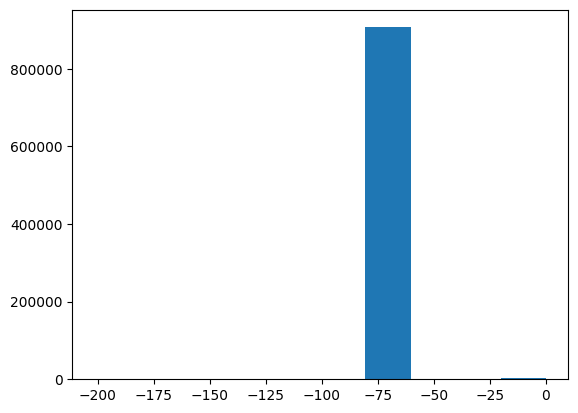

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df_clean2['longitude'])

hay un cero que podemos eliminar

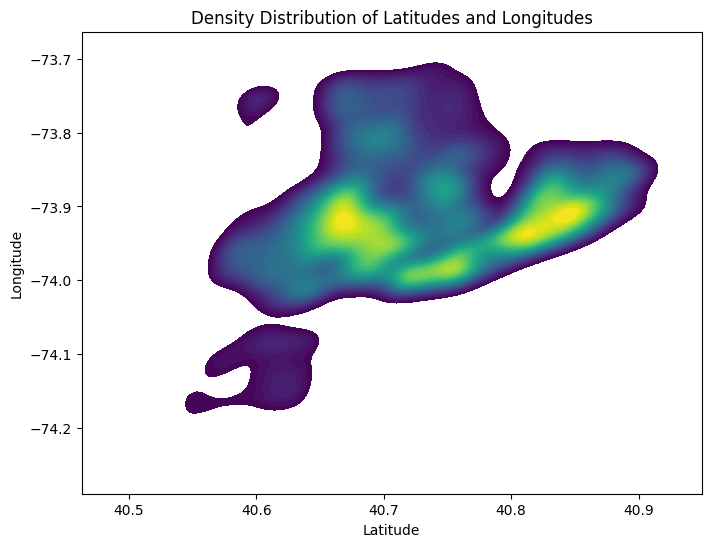

In [71]:
import matplotlib.pyplot as plt
dfll=df_clean2[df_clean2['latitude']>0 ]
dfll=dfll[ dfll['longitude']<0]
latitudes=dfll['latitude']
longitudes=dfll['longitude']

# Plot histogram for 'latitude' (assuming it exists)
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(x=latitudes, y=longitudes, cmap="viridis", fill=True, levels=50)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Density Distribution of Latitudes and Longitudes')
plt.show()

(array([ 59875.,  29412.,  47703., 116910., 114905., 141660., 163804.,
        156674.,  99551.,  69506.]),
 array([   0. ,  143.9,  287.8,  431.7,  575.6,  719.5,  863.4, 1007.3,
        1151.2, 1295.1, 1439. ]),
 <BarContainer object of 10 artists>)

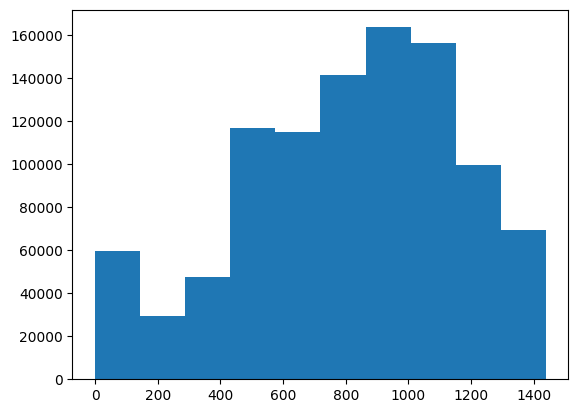

In [85]:
plt.hist(df_clean2['crash_time'])

(array([2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00,
        0.0000e+00, 6.0000e+00, 1.6000e+01, 1.2000e+01, 1.0000e+01,
        3.0000e+00, 1.0000e+01, 6.3000e+01, 5.6000e+01, 6.2180e+03,
        1.5202e+04, 1.5331e+04, 1.4840e+04, 1.50

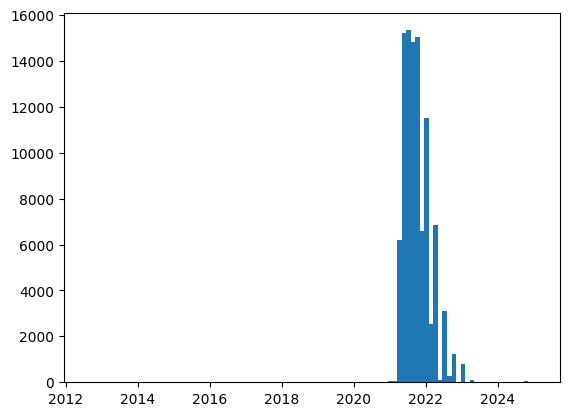

In [76]:
plt.hist(df_clean2['crash_date'], bins=100)

In [87]:
df_clean2.iloc[df_clean2['crash_date'].argmin()]

latitude                                                   40.676937
longitude                                                 -73.921829
number_of_pedestrians_killed                                       0
vehicle_type_code1               Station Wagon/Sport Utility Vehicle
number_of_persons_injured                                          0
number_of_cyclist_killed                                           0
number_of_motorist_injured                                         0
number_of_persons_killed                                           0
contributing_factor_vehicle_1          Failure to Yield Right-of-Way
number_of_pedestrians_injured                                      0
collision_id                                                 4441145
crash_date                                                2012-07-27
crash_time                                                      1253
number_of_motorist_killed                                          0
number_of_cyclist_injured         

hay un dato de 2012 que podemos eliminar

In [91]:
df_clean2['vehicle_type_code1'].unique()

<StringArray>
[                              'Sedan', 'Station Wagon/Sport Utility Vehicle',
                                  <NA>,                       'Pick-up Truck',
                           'Box Truck',                          'Motorcycle',
                                 'Bus',                              'E-Bike',
                                'Bike',                                'Taxi',
 ...
                               'VANET',                               'U-HAL',
      'LARGE COM VEH(6 OR MORE TIRES)',                      'LIVERY VEHICLE',
                                'TAXI',                       'PICK-UP TRUCK',
                                 'BUS',                               'g scl',
                                'Farm',                               '15 pa']
Length: 1195, dtype: string

we have to parse the strings to match between them

In [99]:
vt_clases=df_clean2['vehicle_type_code1'].apply(lambda x:str(x).lower())
vt_clases.value_counts().T

vehicle_type_code1
sedan                                  428105
station wagon/sport utility vehicle    338750
taxi                                    42344
4 dr sedan                              39878
pick-up truck                           27510
                                        ...  
hi-lo                                       1
i1                                          1
grail                                       1
van e                                       1
frh                                         1
Name: count, Length: 845, dtype: int64

In [104]:
cumsumvt=vt_clases.value_counts().T.cumsum()
cumsumvt

vehicle_type_code1
sedan                                   428105
station wagon/sport utility vehicle     766855
taxi                                    809199
4 dr sedan                              849077
pick-up truck                           876587
                                        ...   
hi-lo                                   999996
i1                                      999997
grail                                   999998
van e                                   999999
frh                                    1000000
Name: count, Length: 845, dtype: int64

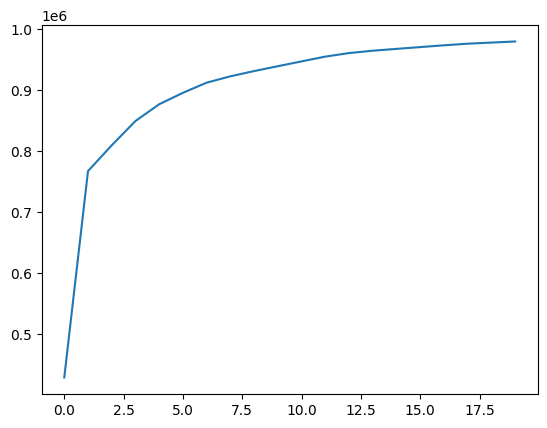

In [107]:
plt.plot(cumsumvt.values[:20])

In [112]:
cumsumvt[:11].index


Index(['sedan', 'station wagon/sport utility vehicle', 'taxi', '4 dr sedan',
       'pick-up truck', 'box truck', 'bus', 'bike', '<na>',
       'tractor truck diesel', 'van'],
      dtype='object', name='vehicle_type_code1')

lest keep only those categories

In [119]:
cumsumcf=df_clean2['contributing_factor_vehicle_1'].value_counts().T.cumsum()
cumsumcf

contributing_factor_vehicle_1
Driver Inattention/Distraction    241063
Unspecified                       471854
Following Too Closely             560979
Failure to Yield Right-of-Way     629655
Backing Unsafely                  674384
                                   ...  
Windshield Inadequate             996578
Listening/Using Headphones        996598
1                                 996608
Drugs (Illegal)                   996618
Cell Phone (hand-held)            996620
Name: count, Length: 61, dtype: Int64

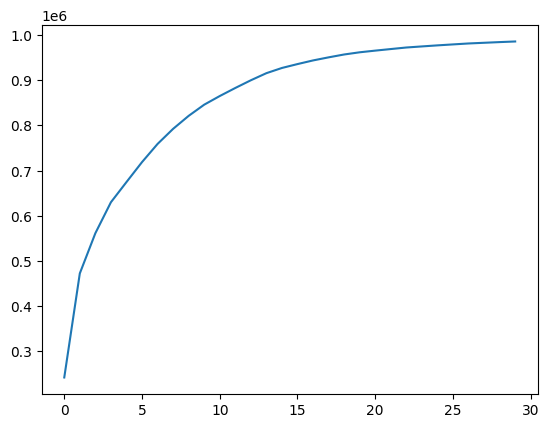

In [123]:
plt.plot(cumsumcf.values[:30])

In [125]:
cumsumcf[:20].index

Index(['Driver Inattention/Distraction', 'Unspecified',
       'Following Too Closely', 'Failure to Yield Right-of-Way',
       'Backing Unsafely', 'Passing or Lane Usage Improper',
       'Passing Too Closely', 'Unsafe Lane Changing', 'Other Vehicular',
       'Turning Improperly', 'Traffic Control Disregarded', 'Unsafe Speed',
       'Driver Inexperience', 'Reaction to Uninvolved Vehicle',
       'Alcohol Involvement', 'Pavement Slippery', 'View Obstructed/Limited',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Oversized Vehicle', 'Aggressive Driving/Road Rage'],
      dtype='string', name='contributing_factor_vehicle_1')

lets keep those, else to Unspecified